<a href="https://colab.research.google.com/github/sonhai1209/Essential_Data_Science_Course_VIASM/blob/master/DS_VIASM_MiniProjects_TukeyStudents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [0]:
data=pd.read_csv("turkiye-student-evaluation_generic.csv")
print(data.columns)
print(data.head())

dataset_question=data.iloc[:,5:33]
print(dataset_question.head())


Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')
   instr  class  nb.repeat  attendance  difficulty  ...  Q24  Q25  Q26  Q27  Q28
0      1      2          1           0           4  ...    3    3    3    3    3
1      1      2          1           1           3  ...    3    3    3    3    3
2      1      2          1           2           4  ...    5    5    5    5    5
3      1      2          1           1           3  ...    3    3    3    3    3
4      1      2          1           0           1  ...    1    1    1    1    1

[5 rows x 33 columns]
   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  ...  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28
0   3   3   3   3   3   3   3   3  ...    3    3    3    3    3    3    3    3
1   3   3   3   3   3   3   3   3  .

In [0]:
pca= PCA(n_components=2)
dataset_question_pca=pca.fit_transform(dataset_question)
print(dataset_question_pca)

wcss=[]

for i in range(1,7):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
  kmeans.fit_transform(dataset_question_pca)
  wcss.append(kmeans.inertia_)
   

[[ 0.98901533  0.52279815]
 [ 0.98901533  0.52279815]
 [-9.59128851  0.64080209]
 ...
 [-9.59128851  0.64080209]
 [11.56931918  0.40479421]
 [11.56931918  0.40479421]]


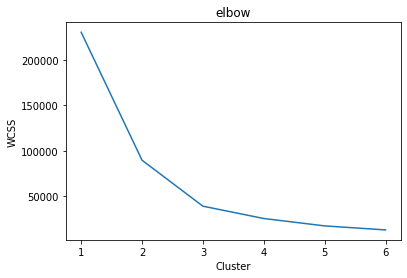

In [0]:
plt.plot(range(1,7),wcss)
plt.title("elbow")
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()

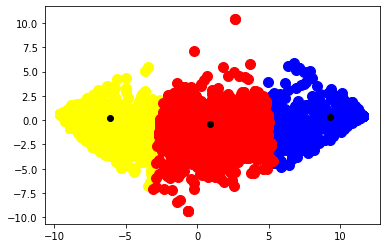

In [0]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(dataset_question_pca)
plt.scatter(dataset_question_pca[y_kmeans==0,0],dataset_question_pca[y_kmeans==0,1],s=100,c='yellow',label='cluster1')
plt.scatter(dataset_question_pca[y_kmeans==1,0],dataset_question_pca[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(dataset_question_pca[y_kmeans==2,0],dataset_question_pca[y_kmeans==2,1],s=100,c='red',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='center')

plt.show()